### Project Brief

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively. The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

### Investment Constraints
- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in


In [175]:
import os
import pandas as pd
import numpy as np

In [90]:
rounds2=pd.read_csv("rounds2.csv",encoding="ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [91]:
rounds2['company_permalink'].nunique()

90247

In [92]:
rounds2.shape

(114949, 6)

In [93]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [94]:
rounds2['permalink']=rounds2['company_permalink'].str.lower()

In [95]:
rounds2['permalink'].nunique()

66370

In [96]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com


In [97]:
companies=pd.read_csv("companies.csv",encoding="ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [98]:
companies.count()

permalink        66368
name             66367
homepage_url     61310
category_list    63220
status           66368
country_code     59410
state_code       57821
region           58338
city             58340
founded_at       51147
dtype: int64

In [99]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [100]:
#there are only two columns in companies data that contains no null values
#if no of unique values in that column= number to total values, then it can be used as uniquely identifying attribute

In [101]:
companies['status'].nunique()==companies['status'].count()

False

In [102]:
companies['permalink'].nunique()==companies['permalink'].count()

True

In [103]:
companies['permalink']=companies['permalink'].str.lower()

In [104]:
#unique companies are present in the companies file?
companies['permalink'].nunique()

66368

In [105]:
#Are there any companies in the rounds2 file which are not  present in companies

In [106]:
rounds2[(~(rounds2['permalink'].isin(companies['permalink'])))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN,/organization/e-cãbica
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN,/organization/energystone-games-çµç³æ¸¸æ
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN,/organization/huizuche-com-æ ç§ÿè½¦
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0,/organization/magnet-tech-ç£ç³ç§æ
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN,/organization/weiche-tech-åè½¦ç§æ
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN,/organization/zengame-ç¦ æ¸¸ç§æ


In [107]:
companies[(~(companies['permalink'].isin(rounds2['permalink'])))]
#companies taht are present in rounds2 and not in companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [108]:
master_frame=pd.merge(rounds2,companies,how='inner',on='permalink')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114938,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114940,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [109]:
master_frame.shape

(114942, 16)

In [110]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [111]:
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [112]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)


In [113]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [114]:
master_frame['funding_round_type'].value_counts()

venture                  50228
seed                     23602
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

In [115]:
funding_type= master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [116]:
funding_type['raised_amount_usd'].groupby(funding_type['funding_round_type']).describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09
seed,23602.0,7.197796e+05,2.221772e+06,0.0,55000.00,275000.0,1000000.0,2.000000e+08
venture,50228.0,1.174895e+07,8.635207e+07,0.0,1600901.75,5000000.0,12000000.0,1.760000e+10


In [117]:
((funding_type['raised_amount_usd'].groupby(funding_type['funding_round_type']).mean())/1000000).sort_values()

funding_round_type
seed               0.719780
angel              0.958694
venture           11.748949
private_equity    73.308593
Name: raised_amount_usd, dtype: float64

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

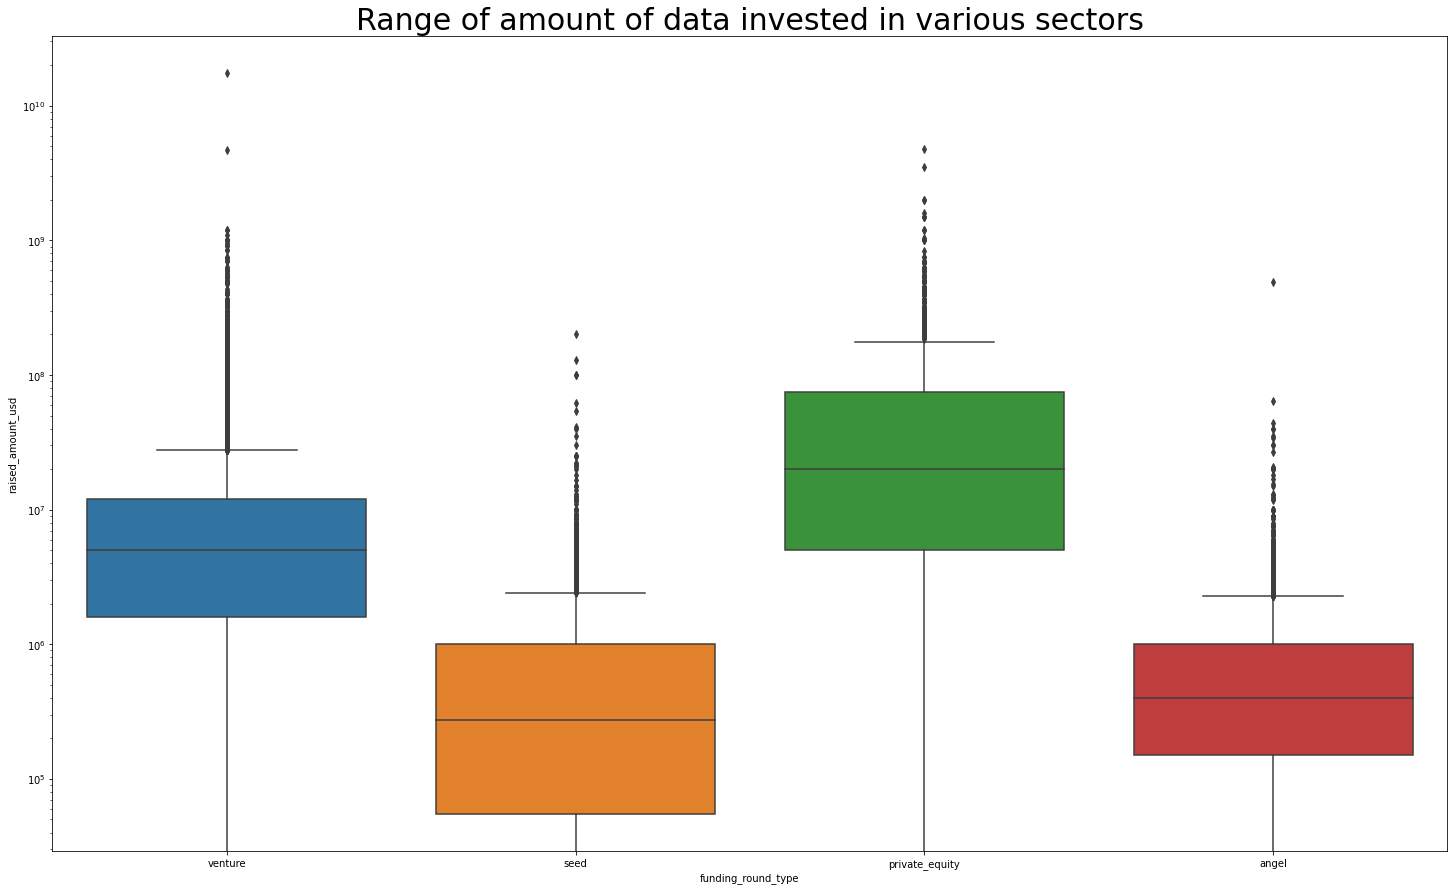

In [119]:
plt.figure(figsize=(25, 15))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=funding_type).set_title("Range of amount of data invested in various sectors",fontdict = { 'fontsize': 30})
plt.yscale('log')
plt.show()

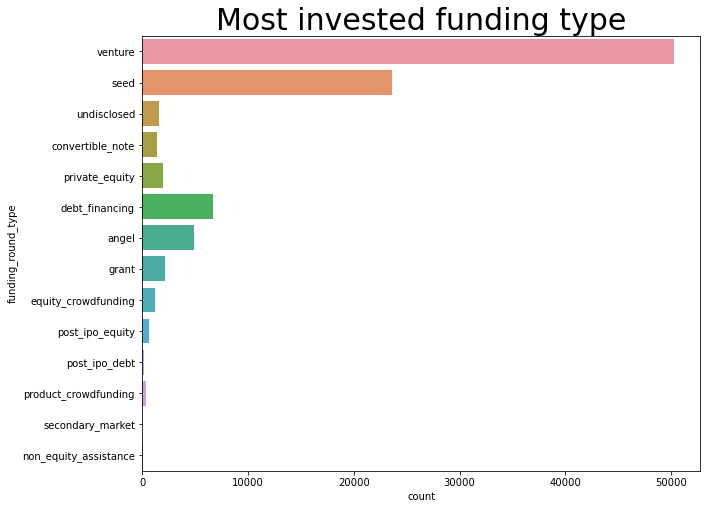

In [120]:
plt.figure(figsize=(10, 8))
sns.countplot(y="funding_round_type", data=master_frame).set_title("Most invested funding type",fontdict = { 'fontsize': 30})
plt.show()

In [121]:
#since spark fund wants to invest in the company where most investors are investing and also the fund amount to be 
#between 5-15 million; Venture would the most suitable investment type

In [122]:
#now the company only wants to target venture type of funding, so deleting all the other funding type rows from dataframe
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

In [123]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114934
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  50228 non-null  object 
 1   funding_round_type       50228 non-null  object 
 2   funded_at                50228 non-null  object 
 3   raised_amount_usd        50228 non-null  float64
 4   permalink                50228 non-null  object 
 5   name                     50228 non-null  object 
 6   homepage_url             47620 non-null  object 
 7   category_list            49726 non-null  object 
 8   status                   50228 non-null  object 
 9   country_code             48111 non-null  object 
 10  state_code               47367 non-null  object 
 11  region                   47515 non-null  object 
 12  city                     47515 non-null  object 
dtypes: float64(1), object(12)
memory usage: 5.4+ MB


In [124]:
#COUNTRY ANALYSIS

In [125]:
top_countries=master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).iloc[:9,]
top_countries

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

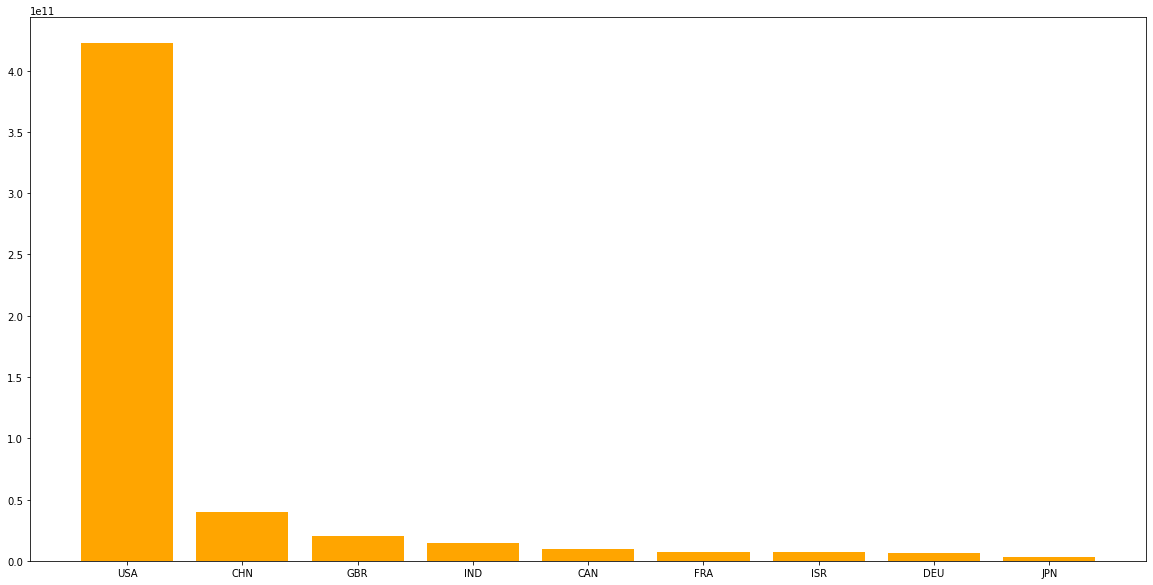

In [126]:
plt.figure(figsize=(20, 10))
plt.bar(x=top_countries.index,height=top_countries,color='orange')
plt.show()

In [127]:
#https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language
#using the wikipedia data, we get that English is one of the official languages in USA,GBR,IND


In [128]:
top_countries= master_frame[master_frame['country_code'].isin(['USA', 'GBR', 'IND' ])]

In [129]:
top_countries

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114913,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont
114915,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont
114916,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont
114927,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge


In [130]:
top_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39018 entries, 0 to 114929
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  39018 non-null  object 
 1   funding_round_type       39018 non-null  object 
 2   funded_at                39018 non-null  object 
 3   raised_amount_usd        39018 non-null  float64
 4   permalink                39018 non-null  object 
 5   name                     39018 non-null  object 
 6   homepage_url             37161 non-null  object 
 7   category_list            38803 non-null  object 
 8   status                   39018 non-null  object 
 9   country_code             39018 non-null  object 
 10  state_code               38945 non-null  object 
 11  region                   38860 non-null  object 
 12  city                     38860 non-null  object 
dtypes: float64(1), object(12)
memory usage: 4.2+ MB


In [131]:
top_countries['country_code'].value_counts()

USA    36139
GBR     2055
IND      824
Name: country_code, dtype: int64

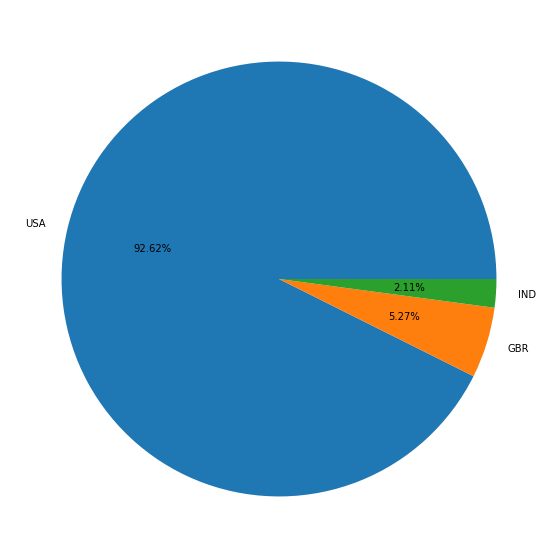

In [132]:
plt.figure(figsize=(20, 10))
plt.pie(top_countries['country_code'].value_counts(),labels=('USA','GBR','IND'),autopct='%1.2f%%', startangle=0)
plt.show()

In [133]:
#sector_wise_analysis
mapping=pd.read_csv('mapping.csv',encoding="ISO-8859-1")
mapping.sample(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
650,Training,0,0,0,0,0,0,0,1,0
396,Language Learning,0,0,0,0,0,0,0,1,0
123,Comics,0,0,0,1,0,0,0,0,0
654,Travel & Tourism,0,0,0,1,0,0,0,0,0
575,Risk Ma0gement,0,0,0,0,0,0,0,0,1
195,Dietary Supplements,0,0,0,0,1,0,0,0,0
141,Consumer Internet,0,0,0,0,0,0,0,0,1
265,Farming,0,0,0,0,0,1,0,0,0
464,Multi-level Marketing,0,0,0,0,0,0,0,0,1
218,EBooks,0,0,0,1,0,0,0,0,0


In [134]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [135]:
top_countries['primary_sector'] = top_countries['category_list'].str.split('|').str[0].str.lower()

<ipython-input-135-d0fc46d708f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries['primary_sector'] = top_countries['category_list'].str.split('|').str[0].str.lower()


In [136]:
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [137]:
mapping = mapping.drop('value', axis=1)

In [138]:
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
mapping

,primary_sector,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [139]:
mapping['primary_sector'] = mapping['primary_sector'].str.lower()

In [140]:
mapping['primary_sector'].sort_values()

1847                 0notechnology
1848    0tural language processing
1849              0tural resources
4602                     0vigation
3441                            3d
                   ...            
2748              wine and spirits
2749                      wireless
5502                         women
5503                  young adults
688                            NaN
Name: primary_sector, Length: 688, dtype: object

In [141]:
mapping['primary_sector'] = mapping['primary_sector'].replace({'0':'na'}, regex=True)

In [142]:
top_countries

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,media
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114913,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology
114915,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology
114916,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology
114927,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,e-commerce


In [143]:
sector_analysis=pd.merge(top_countries,mapping,on='primary_sector',how='left',indicator=True)

In [144]:
sector_analysis['country_code'].value_counts()

USA    36139
GBR     2055
IND      824
Name: country_code, dtype: int64

In [145]:
sector_analysis['primary_sector'].sort_values()

137       3d
31000     3d
20745     3d
20744     3d
16143     3d
        ... 
38029    NaN
38203    NaN
38327    NaN
38377    NaN
38666    NaN
Name: primary_sector, Length: 39018, dtype: object

In [146]:
sector_analysis

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment,both
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising",both
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising",both
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising",both
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39013,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors,both
39014,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors,both
39015,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors,both
39016,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,e-commerce,Others,both


In [147]:
sector_analysis = sector_analysis[sector_analysis['_merge'] == 'both']
sector_analysis = sector_analysis.drop('_merge', axis=1)
sector_analysis.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"


In [148]:
sector_analysis['country_code'].value_counts()

USA    36125
GBR     2054
IND      824
Name: country_code, dtype: int64

In [149]:
sector_analysis

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39013,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors
39014,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors
39015,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors
39016,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,e-commerce,Others


In [150]:
sector_analysis.isnull().sum()

funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          0
homepage_url               1855
category_list               215
status                        0
country_code                  0
state_code                   73
region                      158
city                        158
primary_sector              215
main_sector                   0
dtype: int64

In [151]:
sector_analysis['country_code'].value_counts()

USA    36125
GBR     2054
IND      824
Name: country_code, dtype: int64

In [152]:
sector_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39003 entries, 0 to 39017
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  39003 non-null  object 
 1   funding_round_type       39003 non-null  object 
 2   funded_at                39003 non-null  object 
 3   raised_amount_usd        39003 non-null  float64
 4   permalink                39003 non-null  object 
 5   name                     39003 non-null  object 
 6   homepage_url             37148 non-null  object 
 7   category_list            38788 non-null  object 
 8   status                   39003 non-null  object 
 9   country_code             39003 non-null  object 
 10  state_code               38930 non-null  object 
 11  region                   38845 non-null  object 
 12  city                     38845 non-null  object 
 13  primary_sector           38788 non-null  object 
 14  main_sector           

In [153]:
sector_analysis['main_sector'].nunique()
#9 because others is also included in main sectors

9

In [154]:
sector_analysis=sector_analysis[~(sector_analysis['primary_sector'].isnull())]
sector_analysis.shape

(38788, 15)

In [155]:
#since spark fund only wants to invest between 5-15 million, we'll drop the out of range rows
sector_analysis = sector_analysis.drop(sector_analysis[(sector_analysis.raised_amount_usd < 5000000)].index)
sector_analysis = sector_analysis.drop(sector_analysis[(sector_analysis.raised_amount_usd > 15000000)].index)

In [156]:
sector_analysis.shape

(13012, 15)

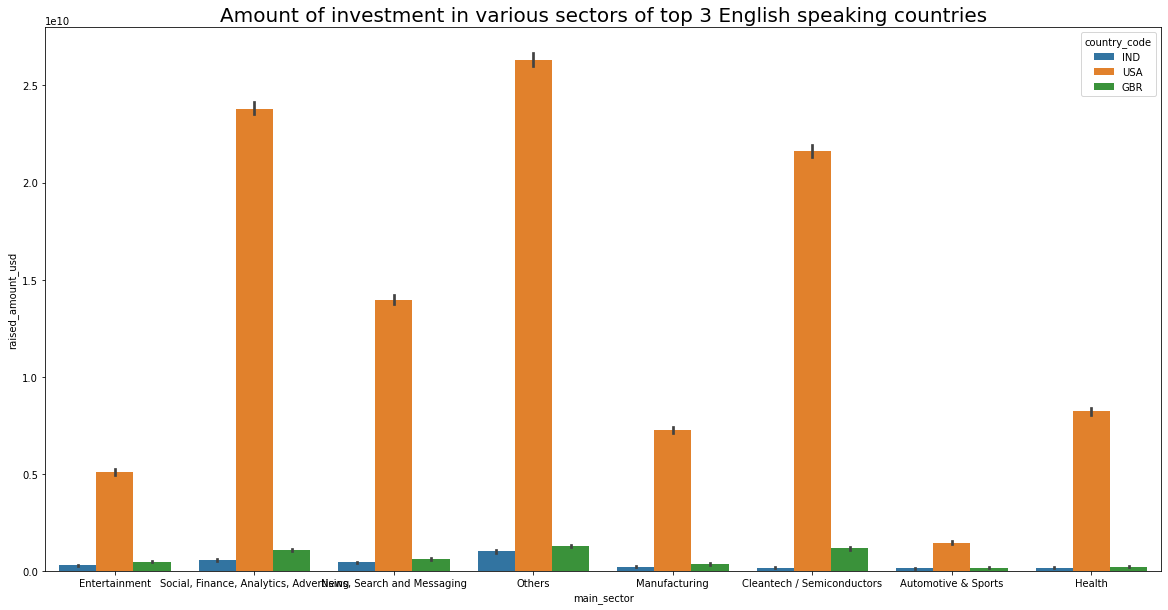

In [157]:
plt.figure(figsize=(20, 10))
sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=sector_analysis, estimator=np.sum).set_title("Amount of investment in various sectors of top 3 English speaking countries",fontdict = { 'fontsize': 20})
plt.show()

In [158]:
c1 = sector_analysis[sector_analysis['country_code'] == 'USA']
c2 = sector_analysis[sector_analysis['country_code'] == 'GBR']
c3 = sector_analysis[sector_analysis['country_code'] == 'IND']

In [159]:
#total number of investments in USA
c1['raised_amount_usd'].count()

12063

In [160]:
#IN GBR
c2['raised_amount_usd'].count()

621

In [161]:
#IND
c3['raised_amount_usd'].count()

328

In [162]:
#total amount of investments in USA
c1['raised_amount_usd'].sum()

107757097294.0

In [163]:
#total amount of investments in GBR
c2['raised_amount_usd'].sum()

5379078691.0

In [164]:
#total amount of investments in IND
c3['raised_amount_usd'].sum()

2949543602.0

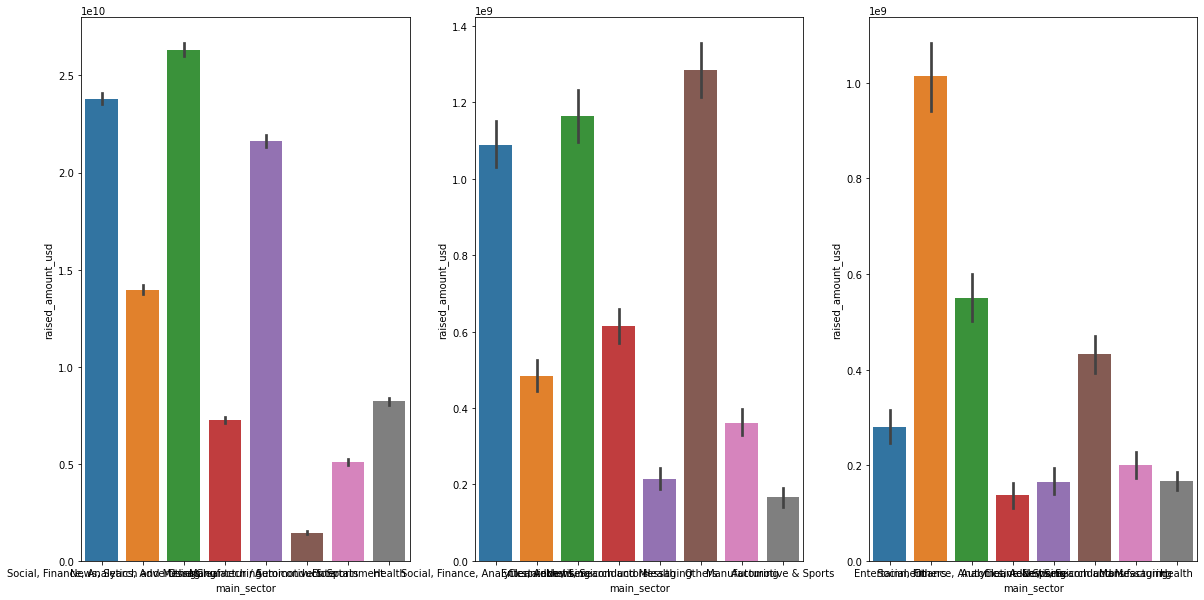

In [165]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.barplot(x='main_sector', y='raised_amount_usd',data= c1, estimator=np.sum)
plt.subplot(1,3,2)
sns.barplot(x='main_sector', y='raised_amount_usd',data= c2, estimator=np.sum)
plt.subplot(1,3,3)
sns.barplot(x='main_sector', y='raised_amount_usd',data= c3, estimator=np.sum)
plt.show()

In [166]:
c1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
#   top-Others                                     2923
#second=Cleantech / Semiconductors                 2297
#third- Social, Finance, Analytics, Advertising    1912

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [167]:
c2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
#   top-Others                                     143
#second=Cleantech / Semiconductors                 127
#third- Social, Finance, Analytics, Advertising    98

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [168]:
c3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
#1-Others                                     109
#2-News, Search and Messaging                  52
#3-Entertainment                               33

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [169]:
c1[c1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [170]:
c1[c1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
/organization/netbase        60600000.0
/organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

In [171]:
c2[c2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [172]:
c2[c2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [173]:
c3[c3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/firstcry-com        39000000.0
/organization/myntra              38000000.0
/organization/commonfloor         32900000.0
/organization/pepperfry-com       28000000.0
/organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [174]:
c3[c3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/manthan-systems               50700000.0
/organization/komli-media                   28000000.0
/organization/shopclues-com                 25000000.0
/organization/intarvo                       21900000.0
/organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64